In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configurando estilos dos gráficos
%matplotlib inline
sns.set(style='whitegrid')

### Explicação das colunas:

- customerID = ID do cliente (valor único)
- gender = gênero do cliente (Male / Female)
- SeniorCitizen = cliente é idoso? (1 / 0)
- Partner = cliente é casado? (1 / 0)
- Dependents = cliente tem filhos? (1 / 0)
- tenure = meses que o cliente ficou com o serviço (int)
- PhoneService = cliente tem serviço de telefone? (Yes / No)
- MultipleLines = cliente tem vários planos? (Yes / No / No phone service)
- InternetService = provedor de internet do cliente ((DSL / Fiber optic / No)
- OnlineSecurity = cliente tem serviço de segurança adicional? (Yes / No / No internet service)
- OnlineBackup = cliente tem backup online? (Yes/ No / No internet service)
- DeviceProtection = cliente tem serviço de proteção ao dispositivo adicional? (Yes/ No / No internet service)
- TechSupport = cliente tem suporte técnico adicional (Yes/ No / No internet service)
- StreamingTV = cliente tem o plano de streaming da TV? (Yes/ No / No internet service)
- StreamingMovies = cliente tem o plano de streaming de filmes? (Yes/ No / No internet service)
- Contract = a duração do tipo de contrato que o cliente tem (Month-to-month / One year / Two year)
- PaperlessBilling = cliente recebe a fatura digital? (Yes / No)
- PaymentMethod = o tipo de pagamento que o cliente realiza (Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic))
- MonthlyCharges = quantidade da cobrança mensal feita ao cliente (int)
- TotalCharges = quantidade total da cobrança feita ao cliente (int)
- Churn = cliente saiu do contrato? (Yes, No)

  "customer churned?" significa = "cliente saiu do contrato?" / "cliente desistiu", e derivados.

In [11]:
df = pd.read_csv('data/telco-customer.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Verificar valores ausentes

In [13]:
df.isnull().sum()
df.dropna()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Verificar o tipo das colunas

In [20]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

## Verificar as estatísticas dos dados

In [22]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


## Contagem de clientes da coluna Churn




In [31]:
churn_rate = df['Churn'].value_counts(normalize=True)  * 100
churn_rate

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribuição dos clientes')

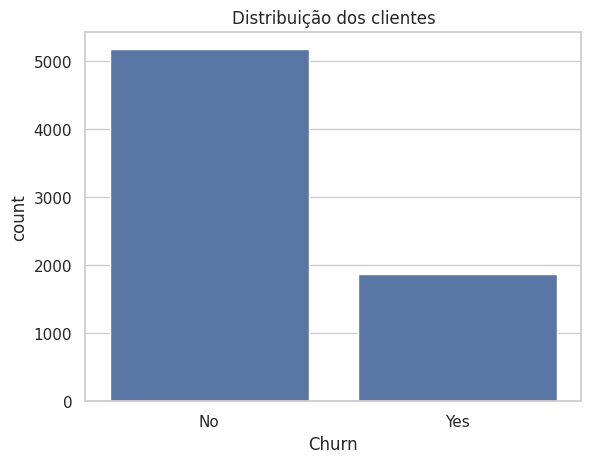

In [33]:
sns.countplot(data=df, x='Churn')
plt.title("Distribuição dos clientes")

## Pré-processamento dos dados

In [43]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
features_to_remove = ['customerID', 'Churn']

for feature in features_to_remove:
    categorical_features.remove(feature)
    
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [37]:
df.customerID

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [59]:
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,No,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,Yes,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,No,False,True,True,False,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [60]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])
df_encoded

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0.115423,0.001275,No,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,0,34,0.385075,0.215867,No,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,0.354229,0.010310,Yes,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,0,45,0.239303,0.210241,No,False,True,True,False,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,0,2,0.521891,0.015330,Yes,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.662189,0.227521,No,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,2234-XADUH,0,72,0.845274,0.847461,No,True,False,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,4801-JZAZL,0,11,0.112935,0.037809,No,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,8361-LTMKD,1,4,0.558706,0.033210,Yes,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True


In [63]:
#df_encoded.Churn = df_encoded.Churn.map({'No':0,'Yes':1})
df_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0.115423,0.001275,0,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,0,34,0.385075,0.215867,0,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,0.354229,0.010310,1,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,0,45,0.239303,0.210241,0,False,True,True,False,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,0,2,0.521891,0.015330,1,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [67]:
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded.Churn 
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)